# Analysis of Real Estate Data

Let's import pandas library and set options to be able to view data right in the browser.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [4]:
spb_df = pd.read_table('/home/jovyan/__DATA/BABD2021_FALL/data/spb.real.estate.archive.2018.tsv')

Let's check how much data in terms of rows we have where each row represent one offer from Yandex.Realty

In [6]:
len(spb_df)

429187

In [7]:
spb_df.sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
339293,8477378716906044160,2017-10-15T00:00:00+03:00,2018-08-20T00:00:00+03:00,36000.0,4,False,2,False,65.0,18.0,40.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, улица Черняховского, 11",7886635031986085559
280400,8308010880524543955,2017-08-28T00:00:00+03:00,2018-03-05T00:00:00+03:00,14700000.0,3,False,3,False,87.0,NaN,60.0,0.0,11.0,1,2,"Россия, Санкт-Петербург, Пушкин, Пушкинская улица, 43",2838852459318609039
134724,9174606537144058802,2017-02-16T00:00:00+03:00,2018-02-07T00:00:00+03:00,9800000.0,12,False,3,False,84.2,9.3,54.3,NaN,0.0,1,2,"Россия, Санкт-Петербург, Мебельная улица, 35к2",8602447095160085034
10640,42606225877214719,2015-08-26T00:00:00+03:00,2017-06-08T00:00:00+03:00,10093000.0,8,False,3,False,89.5,NaN,52.1,NaN,0.0,1,2,"Россия, Санкт-Петербург, Кременчугская улица, 9к2",2673073420900495465
126262,7258486944673666518,2017-01-23T00:00:00+03:00,2018-08-20T00:00:00+03:00,4500000.0,1,False,2,False,51.0,8.0,35.0,NaN,NaN,1,2,"Россия, Санкт-Петербург, Саблинская улица, 13",6842928614883251674
127299,7621245106207575136,2017-01-25T00:00:00+03:00,2017-10-02T00:00:00+03:00,2623000.0,8,False,0,True,32.0,NaN,22.0,0.0,2.0,1,2,"Россия, Санкт-Петербург, Большеохтинский проспект, 15к1",9092469374927980274
292819,5345621945103207936,2018-02-14T00:00:00+03:00,2018-06-07T00:00:00+03:00,1300000.0,9,False,2,False,55.0,NaN,NaN,NaN,NaN,1,2,"Россия, Ленинградская область, Сланцевское городское поселение, Сланцы, улица Ленина, 25к6",4698070983857759546
392379,2226426730195108864,2018-07-05T00:00:00+03:00,2018-07-19T00:00:00+03:00,30500.0,2,False,0,True,24.0,NaN,NaN,40.0,3.0,2,2,"Россия, Санкт-Петербург, Каменноостровский проспект, 52",5622402749203138811
147253,9069199666281295261,2017-03-07T00:00:00+03:00,2017-03-16T00:00:00+03:00,3650000.0,2,False,1,False,43.0,13.0,28.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Галицкая улица, 8к2",236695980173875230
212471,1896730479090066888,2016-12-20T00:00:00+03:00,2017-09-06T00:00:00+03:00,55000.0,6,False,2,False,80.0,10.0,54.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Оренбургская улица, 2",1290591448451841021


### Analyze prices for rent and sell
We see that we have both rent and sell data. 
<p>offer_type column contains data to distinct them, 2 stands for renting, 1 for selling.

#### Analyze rent prices

At first let's split our dataframe to rent and sell.

In [11]:
rent_df = spb_df[spb_df.offer_type == 2]
sell_df = spb_df[spb_df.offer_type == 1]
print("Total rent data size: {}".format(len(rent_df)))
print("Total sell data size: {}".format(len(sell_df)))

Total rent data size: 171186
Total sell data size: 258001


Let's check median and price for renting apartments.

In [12]:
rent_median_price = rent_df.last_price.median()
rent_mean_price = rent_df.last_price.mean()
print("Rent median price: {}".format(rent_median_price))
print("Rent mean price: {}".format(rent_mean_price))

Rent median price: 25000.0
Rent mean price: 31719.256638977487


#### Let's look at the most expensive apartments in rent

In [14]:
max_price_rent = rent_df.last_price.max()

In [15]:
print("Max price in rent: {}".format(max_price_rent))

Max price in rent: 4900000.0


Now select all offers where price is equal to maximum value across all rent prices.

In [16]:
rent_df_max = rent_df[rent_df.last_price == max_price_rent]

In [17]:
rent_df_max

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
123675,5594900220237251840,2017-01-16T00:00:00+03:00,2017-01-16T00:00:00+03:00,4900000.0,3,False,3,False,55.4,5.5,42.1,NaN,0.0,2,2,"Россия, Санкт-Петербург, Новочеркасский проспект, 36",7844665691371923607


We can see that it was probably a mistake. It's hard to imagine why an aparment could cost 4.9 mln rubles per month. To analyze it let's look at the random sample of rent offers with prices of more than 1 mln rubles. Knowing real estate market in St.Petersburg we understand that offers with rent prices over 1 million rubles are outliers.

In [18]:
outliers_rent = rent_df[rent_df.last_price > 1000000]
print("Number of outliers in rent: {}".format(len(outliers_rent)))

Number of outliers in rent: 22


In [19]:
outliers_rent.sample(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
98330,8743101202301731585,2016-10-13T00:00:00+03:00,2016-11-12T00:00:00+03:00,1500000.0,3,False,2,False,54.7,NaN,NaN,NaN,7.0,2,2,"Россия, Ленинградская область, Выборгский район, Светогорское городское поселение, поселок городского типа Лесогорский, улица Труда, 7",2755098623625145659
349765,7521881594612635746,2018-05-14T00:00:00+03:00,2018-05-21T00:00:00+03:00,4700000.0,10,False,1,False,40.3,8.3,20.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, Ленинский проспект, 111к2",2371480959169104773
289038,4088017598264857345,2018-02-09T00:00:00+03:00,2018-03-21T00:00:00+03:00,1330000.0,3,False,1,False,33.0,6.0,19.0,NaN,3.0,2,2,"Россия, Ленинградская область, Луга, проспект Урицкого, 65",1792010144615909485
83893,4075481786711135488,2016-08-18T00:00:00+03:00,2016-08-18T00:00:00+03:00,3500000.0,1,False,2,False,55.0,8.3,30.5,NaN,3.0,2,2,"Россия, Ленинградская область, Всеволожск, микрорайон Южный, Центральная улица, 13",4521154714631889065
306476,6589696843731071745,2018-03-12T00:00:00+03:00,2018-04-02T00:00:00+03:00,2500000.0,2,False,4,False,150.0,53.0,47.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, Волховский переулок, 4",4642914072625498389


We see that all of these offers are results of user mistakes. Let's now look at rent offers below 1M but more than 500K

In [21]:
rent_df[(rent_df.last_price > 500000) & (rent_df.last_price < 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
83621,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
89836,6302977522901450489,2016-09-14T00:00:00+03:00,2016-09-15T00:00:00+03:00,800000.0,2,False,2,False,80.0,20.0,40.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Большая Морская улица, 27",8010764606439654926
106222,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
172166,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508
172950,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
253075,9174606537144832259,2017-11-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,600000.0,1,False,4,False,165.0,NaN,115.0,NaN,6.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
321216,2596865999798823681,2018-03-31T00:00:00+03:00,2018-04-04T00:00:00+03:00,575000.0,3,False,4,False,120.0,NaN,NaN,50.0,1.0,2,2,"Россия, Санкт-Петербург, Кременчугская улица, 17к3",9078299753075959719
323711,9106659135022232833,2018-04-03T00:00:00+03:00,2018-06-15T00:00:00+03:00,600000.0,1,False,4,False,90.0,13.0,54.0,0.0,11.0,2,2,"Россия, Санкт-Петербург, Большой Сампсониевский проспект, 33/1",192308642065385452
336616,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
419166,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355


for these cases sometimes it seems that the price is correct - in the unified_address column we see that these offers are from elite houses like here: https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20проспект%20Динамо%2C%206/snyat/kvartira/ but for some of them price seems to be 10 times more than it should be, like here https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Большая%20Морская%20улица%2C%2027/snyat/kvartira/
Let's find these cases.

### Calculate price per square meter, get median prices for house and find outliers with the help of this

Let's create a new column price_per_sq_m and calculate price per sq m.

In [67]:
rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area

In [68]:
rent_df.head(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
0,1100202,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,7,False,1,False,28.0,8.0,20.0,100.0,3.0,2,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,714.285714,512.820513
1,4593125,2015-11-17T00:00:00+03:00,2016-03-04T00:00:00+03:00,24000.0,4,False,2,False,59.0,10.0,35.0,100.0,3.0,2,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,406.779661,512.820513
2,4586184,2015-11-17T00:00:00+03:00,2016-04-24T00:00:00+03:00,18000.0,6,False,1,False,36.0,9.0,17.0,100.0,3.0,2,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,500.000000,512.820513
3,5308071,2016-02-04T00:00:00+03:00,2016-02-28T00:00:00+03:00,18000.0,8,False,1,False,39.0,10.0,18.0,90.0,0.0,2,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,461.538462,512.820513
4,7534283612538021121,2016-02-28T00:00:00+03:00,2016-04-02T00:00:00+03:00,19000.0,3,False,1,False,36.0,8.0,18.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,527.777778,512.820513


Let's find what's median and mean price per square meter in rent.

In [69]:
median_price_per_sq_m = rent_df.price_per_sq_m.median()
mean_price_per_sq_m = rent_df.price_per_sq_m.mean()
print("Median price per sq m in rent: {}".format(median_price_per_sq_m))
print("Mean price per sq m in rent: {}".format(mean_price_per_sq_m))

Median price per sq m in rent: 550.0
Mean price per sq m in rent: 600.1110692968091


#### Find median price per sq m per house

In [70]:
house_rent_df = rent_df.groupby('unified_address').price_per_sq_m.median().reset_index()

In [71]:
house_rent_df.head(5)

,unified_address,price_per_sq_m
0,"Россия, Ленинградская область, Бокситогорск, Комсомольская улица, 5А",171.428571
1,"Россия, Ленинградская область, Бокситогорск, Южная улица, 15",250.000000
2,"Россия, Ленинградская область, Бокситогорск, улица Металлургов, 7",164.948454
3,"Россия, Ленинградская область, Бокситогорск, улица Павлова, 37",138.888889
4,"Россия, Ленинградская область, Бокситогорский район, Пикалёво, 6-й микрорайон, 25",195.652174


Let's Rename the column with a 'rename' function in this new dataframe

In [72]:
house_rent_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

#### Merge rent data with house median prices and inspect outliers

As these 2 dataframes have only one common column name (unified_address) it will merge dataframes by it.

In [73]:
rent_df = rent_df.merge(house_rent_df)

Let's assign outliers if price per sq m is 5 times higher than the median value in the house.

In [74]:
outliers = rent_df[(rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5]

In [31]:
print(len(outliers))

49


In [75]:
outliers.sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
793,5340729,2016-02-08T00:00:00+03:00,2016-02-15T00:00:00+03:00,2550000.0,8,False,1,False,38.0,6.0,19.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Варшавская улица, 51к1",6532707473577967135,67105.263158,555.555556
11828,6312877784414089984,2018-03-27T00:00:00+03:00,2018-03-27T00:00:00+03:00,200500.0,9,False,2,False,60.0,10.0,32.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, проспект Народного Ополчения, 131",7393117043173358830,3341.666667,533.333333
139697,8535940262361472000,2018-07-12T00:00:00+03:00,2018-07-16T00:00:00+03:00,2900000.0,2,False,1,False,29.3,7.2,15.1,NaN,NaN,2,2,"Россия, Санкт-Петербург, Альпийский переулок, 22",2164916565767642422,98976.109215,576.707727
109040,7710633944129267457,2017-08-07T00:00:00+03:00,2017-11-07T00:00:00+03:00,4500000.0,7,False,1,False,63.1,16.1,23.4,NaN,0.0,2,2,"Россия, Санкт-Петербург, Колпино, улица Ижорского Батальона, 18",6064043689074707027,71315.372425,397.674419
122445,2149227771102617088,2016-10-24T00:00:00+03:00,2016-10-26T00:00:00+03:00,400000.0,8,False,1,False,56.0,28.0,19.0,100.0,3.0,2,2,"Россия, Санкт-Петербург, Большой проспект Васильевского острова, 58",9185529517877050892,7142.857143,775.862069
80391,5565310413830597669,2018-06-19T00:00:00+03:00,2018-06-26T00:00:00+03:00,200000.0,13,False,0,True,40.0,NaN,21.5,100.0,NaN,2,2,"Россия, Ленинградская область, Всеволожский район, деревня Новое Девяткино, Арсенальная улица, 7",1966219418622870596,5000.000000,452.272727
109845,4266909851082118912,2017-01-14T00:00:00+03:00,2017-05-27T00:00:00+03:00,3100000.0,2,False,1,False,39.0,7.0,20.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Петергоф, Озерковая улица, 39к1",6053955221850724766,79487.179487,466.666667
74443,6920678992116580097,2018-07-13T00:00:00+03:00,2018-07-16T00:00:00+03:00,1432748.0,9,False,2,False,59.0,11.0,35.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Энтузиастов, 43к1",8806624394643633231,24283.864407,442.657343
133370,5594900220237251840,2017-01-16T00:00:00+03:00,2017-01-16T00:00:00+03:00,4900000.0,3,False,3,False,55.4,5.5,42.1,NaN,0.0,2,2,"Россия, Санкт-Петербург, Новочеркасский проспект, 36",7844665691371923607,88447.653430,695.378151
2471,5565310413830597579,2018-06-19T00:00:00+03:00,2018-06-26T00:00:00+03:00,180000.0,2,False,0,True,27.0,NaN,NaN,100.0,NaN,2,2,"Россия, Санкт-Петербург, Кондратьевский проспект, 64к9",1081182048329084375,6666.666667,638.888889


#### Clean data from the outliers

Let's create a new dataframe with clean data.

In [77]:
rent_df_cleaned = rent_df[~((rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5)]

Let's check that in the middle segment everything is fine now.

In [78]:
rent_df_cleaned[(rent_df_cleaned.last_price > 500000) & (rent_df_cleaned.last_price < 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
95391,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508,3000.000000,1385.501355
96070,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3055.555556,1442.307692
96075,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
154614,9174606537144832259,2017-11-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,600000.0,1,False,4,False,165.0,NaN,115.0,NaN,6.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,3636.363636,3636.363636
154615,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,5128.205128,3636.363636
154617,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,4285.714286,3636.363636


In [79]:
# look at offers with price > 1 000 000
rent_df_cleaned[(rent_df_cleaned.last_price >= 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
67005,5199154,2016-01-25T00:00:00+03:00,2016-01-26T00:00:00+03:00,3800000.0,3,False,2,False,51.0,6.0,30.5,NaN,0.0,2,2,"Россия, Санкт-Петербург, Пискарёвский проспект, 149",7757194067653498771,74509.803922,74509.803922
95935,8743101202301731585,2016-10-13T00:00:00+03:00,2016-11-12T00:00:00+03:00,1500000.0,3,False,2,False,54.7,NaN,NaN,NaN,7.0,2,2,"Россия, Ленинградская область, Выборгский район, Светогорское городское поселение, поселок городского типа Лесогорский, улица Труда, 7",2755098623625145659,27422.303473,13811.700183
114024,4075481786711135488,2016-08-18T00:00:00+03:00,2016-08-18T00:00:00+03:00,3500000.0,1,False,2,False,55.0,8.3,30.5,NaN,3.0,2,2,"Россия, Ленинградская область, Всеволожск, микрорайон Южный, Центральная улица, 13",4521154714631889065,63636.363636,63636.363636
164662,4088017598264857345,2018-02-09T00:00:00+03:00,2018-03-21T00:00:00+03:00,1330000.0,3,False,1,False,33.0,6.0,19.0,NaN,3.0,2,2,"Россия, Ленинградская область, Луга, проспект Урицкого, 65",1792010144615909485,40303.030303,40303.030303


We see, that all of them are outliers, they were not cleaned by the house price per sq m median because it was the only one or just one of two offers per house. Let's clean them also and store result in the same dataframe.

In [80]:
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned.last_price < 1000000]

In [81]:
# let's examine apartments with big price per sq m
rent_df_cleaned[rent_df_cleaned.price_per_sq_m > 3000]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
549,8596035942924139265,2018-05-17T00:00:00+03:00,2018-07-04T00:00:00+03:00,450000.0,6,False,2,False,106.0,15.0,65.0,30.0,NaN,2,2,"Россия, Санкт-Петербург, Воскресенская набережная, 4",7262659557693263963,4245.283019,975.609756
28182,1492050389917501301,2017-06-07T00:00:00+03:00,2017-06-07T00:00:00+03:00,195000.0,4,False,1,False,57.0,8.0,19.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, проспект Добролюбова, 2",6684242979485775735,3421.052632,779.220779
39213,3793550987719225600,2017-03-19T00:00:00+03:00,2017-11-02T00:00:00+03:00,310000.0,3,False,4,False,100.0,14.0,71.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Лиговский проспект, 123",2861706125080798064,3100.000000,976.307190
44574,1896730477284436579,2017-05-31T00:00:00+03:00,2017-05-31T00:00:00+03:00,230000.0,9,False,2,False,67.0,14.0,30.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Глухая Зеленина улица, 6",6445545084936583797,3432.835821,923.076923
96070,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3055.555556,1442.307692
96075,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
99409,7102677476104578816,2016-05-20T00:00:00+03:00,2016-05-20T00:00:00+03:00,270000.0,1,False,1,False,80.0,NaN,NaN,0.0,3.0,2,2,"Россия, Санкт-Петербург, Загородный проспект, 5",8810747501928407960,3375.000000,1978.197674
104668,159653575951184384,2016-06-16T00:00:00+03:00,2016-07-01T00:00:00+03:00,300000.0,2,False,3,False,54.0,8.0,35.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, 18-я линия В.О., 43",6003296125598219505,5555.555556,5555.555556
150701,1492050390917641037,2016-10-28T00:00:00+03:00,2017-06-07T00:00:00+03:00,400000.0,4,False,3,False,130.0,13.0,85.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Константиновский проспект, 23",5091810811209082905,3076.923077,3484.848485


We can see that outliers are those which are in houses with price per sq m below 1000 rubles, and those which are the same with median, in which case it's the only offer per house.

In [82]:
outliers_count = len(rent_df_cleaned[(rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m))])
print("outliers found: {}".format(outliers_count))
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m)))]

outliers found: 8


Now max price should be correct, let's look at this offer.

In [83]:
max_rent_apartment = rent_df_cleaned[rent_df_cleaned.last_price == rent_df_cleaned.last_price.max()]
max_rent_apartment

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692


Let's look at house address. 

In [84]:
max_rent_apartment.unified_address.iloc[0]

'Россия, Санкт-Петербург, Парадная улица, 3к1'

In [41]:
# impoort urllib to prepare correct URLs for looking at offers archive at https://realty.yandex.ru/archive
import urllib

Let's print the URL of the page, on which we can find our offer. Use filters there to select only apartments with 4 rooms.

In [85]:
print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))

https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%BD%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%203%D0%BA1/snyat/kvartira/


### Find houses with the most cheapest and the most expensive rent price

In [86]:
# Create a new dataframe with houses and median price per sq m
# This time it should with the data calculated without outliers
house_rent_df_cleaned = rent_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)

In [87]:
most_expensive_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.max()]
most_expensive_house

,unified_address,house_price_sqm_median_cleaned
16851,"Россия, Санкт-Петербург, проспект Динамо, 6",3705.357143


In [88]:
# We can look at the most expensive house here
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20проспект%20Динамо%2C%206/snyat/kvartira/
print("https://realty.yandex.ru/archive/{}/snyat/kvartira/".format(urllib.parse.quote(most_expensive_house.unified_address.iloc[0])))

https://realty.yandex.ru/archive/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82%20%D0%94%D0%B8%D0%BD%D0%B0%D0%BC%D0%BE%2C%206/snyat/kvartira/


#### Find the most cheapest house for rent

In [89]:
most_cheapest_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.min()]
most_cheapest_house

,unified_address,house_price_sqm_median_cleaned
2421,"Россия, Ленинградская область, Кириши, улица Мира, 14",50.0


We see that it's located in Leningrad Oblast, let's look only in St. Petersburg data.

In [90]:
house_rent_df_cleaned_spb = house_rent_df_cleaned[house_rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]

,unified_address,house_price_sqm_median_cleaned
4852,"Россия, Санкт-Петербург, Большая Зеленина улица, 12",76.923077


#### Clean cheap outliers
We see that we should clean the data, the cheapest house above is definitely a mistake, and it is an underground station building. 

In [91]:
# consider only data inside the city without oblast
rent_df_cleaned_spb = rent_df_cleaned[rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_sq_m_in_spb = rent_df_cleaned_spb.price_per_sq_m.median()
print("Median price per sq m in St. Petersburg in rent: {}".format(median_price_per_sq_m_in_spb))

Median price per sq m in St. Petersburg in rent: 555.5555555555555


Let's look at cheap apartments which are more than two times cheaper than the median value of offers we calculated above (555).

In [92]:
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 250].sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
135849,5565310413832448401,2018-06-05T00:00:00+03:00,2018-06-12T00:00:00+03:00,24300.0,5,False,0,True,98.0,NaN,NaN,100.0,NaN,2,2,"Россия, Санкт-Петербург, улица Еремеева, 5к2",7190031462341416771,247.959184,446.428571
131636,3254179028827662592,2017-03-23T00:00:00+03:00,2017-03-30T00:00:00+03:00,18000.0,8,False,3,False,80.0,12.0,54.0,70.0,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 26к1",9059817452517931591,225.000000,310.344828
153899,8956882277147409665,2018-04-24T00:00:00+03:00,2018-05-19T00:00:00+03:00,16000.0,6,False,3,False,80.0,12.0,54.0,75.0,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Колпинское шоссе, 34к3",7936294240150898963,200.000000,322.580645
161397,928301403276080384,2018-03-09T00:00:00+03:00,2018-08-18T00:00:00+03:00,19000.0,5,False,3,False,80.0,NaN,NaN,NaN,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 3к1",897860344996780194,237.500000,276.923077
127281,7515920720182359297,2018-01-19T00:00:00+03:00,2018-01-23T00:00:00+03:00,15000.0,2,False,2,False,61.0,11.0,40.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Изборская улица, 1к1",7727526934365675233,245.901639,338.461538
164125,244177626765830201,2018-03-22T00:00:00+03:00,2018-08-16T00:00:00+03:00,14000.0,3,False,2,False,57.0,12.0,28.0,100.0,4.0,2,2,"Россия, Санкт-Петербург, Колпино, улица Ижорского Батальона, 8",2184610729218177396,245.614035,300.000000
120848,8982267387091314689,2017-12-07T00:00:00+03:00,2017-12-08T00:00:00+03:00,17000.0,2,False,2,False,70.0,11.0,25.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 14-16",4153179922410625475,242.857143,264.912281
96184,5836091506479056129,2016-05-14T00:00:00+03:00,2016-05-24T00:00:00+03:00,16000.0,7,False,3,False,80.0,12.0,48.0,80.0,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Полоцкая улица, 3",5139440287095964726,200.000000,225.000000
161583,3866335244825576449,2017-12-17T00:00:00+03:00,2017-12-18T00:00:00+03:00,15000.0,4,False,2,False,65.0,NaN,NaN,NaN,11.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Изборская улица, 4к1",7727526934365678116,230.769231,267.613636
56559,4842857799866190058,2018-05-18T00:00:00+03:00,2018-05-18T00:00:00+03:00,12000.0,7,False,2,False,60.0,NaN,45.0,NaN,NaN,2,2,"Россия, Санкт-Петербург, бульвар Новаторов, 112",5402083903596069706,200.000000,567.531306


In [93]:
# it seems that we should clean all apartments where median price is at least 2x higher and cheap 
outliers = rent_df_cleaned_spb[(rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2)]

In [94]:
print("number of cheap outliers 2x cheaper: {}".format(len(outliers)))

number of cheap outliers 2x cheaper: 100


In [95]:
# clean outliers
rent_df_cleaned_spb = rent_df_cleaned_spb[~((rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2))]

In [96]:
# look at cheap apartments which were not cleaned with the previous heuristics
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 200]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
46867,4857633,2015-12-13T00:00:00+03:00,2016-06-05T00:00:00+03:00,12000.0,6,False,3,False,61.0,7.0,42.0,80.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Стрельнинское шоссе, 6к3",1523555400005784785,196.721311,256.578947
57861,4975278,2015-12-27T00:00:00+03:00,2016-01-12T00:00:00+03:00,13000.0,4,False,3,False,78.0,10.0,47.0,NaN,10.0,2,2,"Россия, Санкт-Петербург, 12-я Красноармейская улица, 7",6204918944542168630,166.666667,166.666667
80404,2939523434608526081,2018-03-06T00:00:00+03:00,2018-03-13T00:00:00+03:00,15000.0,6,False,3,False,87.0,NaN,NaN,NaN,3.0,2,2,"Россия, Санкт-Петербург, Окраинная улица, 9В",4510539508387660402,172.413793,241.715116
85844,249021112485953840,2016-03-21T00:00:00+03:00,2016-07-05T00:00:00+03:00,12000.0,3,False,4,False,112.0,14.0,16.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Свеаборгская улица, 23",4943588578198944211,107.142857,107.142857
91302,8176284694677069056,2016-05-18T00:00:00+03:00,2016-05-18T00:00:00+03:00,14000.0,4,False,3,False,74.0,10.0,NaN,50.0,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 6к3",4976238169808254780,189.189189,291.963016
101249,5379909360861020417,2016-06-02T00:00:00+03:00,2016-06-09T00:00:00+03:00,14000.0,3,False,3,False,80.0,12.0,NaN,80.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 27",5194982532050895016,175.000000,233.333333
105186,801981697508642560,2016-06-20T00:00:00+03:00,2016-06-29T00:00:00+03:00,12000.0,6,False,5,False,156.0,23.0,16.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, Большая Зеленина улица, 12",7137635118733633172,76.923077,76.923077
105957,6302976505020612958,2016-06-25T00:00:00+03:00,2016-11-08T00:00:00+03:00,17000.0,4,False,3,False,100.0,16.0,20.0,50.0,0.0,2,2,"Россия, Санкт-Петербург, Центральный район, улица Некрасова, 38",4677861887331789522,170.000000,170.000000
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592
120839,2164881834443110913,2017-05-07T00:00:00+03:00,2017-05-14T00:00:00+03:00,15000.0,5,False,3,False,93.0,10.0,54.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 14-16",4153179922410625475,161.290323,264.912281


There are cases where houses had just one offer and house median equals offer's price per square meter. Let's remove these outliers.

In [97]:
rent_df_cleaned_spb = rent_df_cleaned_spb[~((rent_df_cleaned_spb.price_per_sq_m < 200) 
                                          & (rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.house_price_sqm_median))]

In [98]:
# look at the cheapest apartment
cheapest_offer = rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.price_per_sq_m.min()]
cheapest_offer

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592


#### Recalculate houses price medians on the cleaned data and find the cheapest house

In [99]:
house_rent_df_cleaned_spb = rent_df_cleaned_spb.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned_spb.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)
cheapest_house = house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]
cheapest_house

,unified_address,house_price_sqm_median_cleaned
5245,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",183.098592


Looking at the map we understand why it's so cheap: it's far away from the center of the city.

In [100]:
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Красное%20Село%2C%20Нагорная%20улица%2C%2037/snyat/kvartira/
print("https://realty.yandex.ru/archive/{}/snyat/kvartira/".format(urllib.parse.quote(cheapest_house.unified_address.iloc[0])))

https://realty.yandex.ru/archive/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9A%D1%80%D0%B0%D1%81%D0%BD%D0%BE%D0%B5%20%D0%A1%D0%B5%D0%BB%D0%BE%2C%20%D0%9D%D0%B0%D0%B3%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%2037/snyat/kvartira/


### Analyze how many offers have the commission 

Some offers has commision fee for the agent (agent_fee).

In [101]:
rent_df_cleaned_spb.agent_fee.value_counts(normalize=True, dropna=False)

100.000000    0.328129
50.000000     0.293380
NaN           0.209340
0.000000      0.035378
90.000000     0.034537
                ...   
11.000000     0.000006
12.000000     0.000006
64.997665     0.000006
12.000343     0.000006
99.990000     0.000006
Name: agent_fee, Length: 102, dtype: float64

We see that the most popular commission is 100% - 33% of offers. 21% of offers don't have any information about commission.

### Self-control stops
1. Calculate median and mean prices for apartments for rent after cleaning the data in St.Petersburg without Leningrad Oblast.
2. Calculate median and mean prices for apartments for sell before cleaning the data.
3. Find houses (not apartments!) with the most cheapest and most expensive sell price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers.
4. Find the most expensive and the most cheapest apartment for sell in St. Petersburg after cleaning outliers.
5. Calculate how many years does it take to cover all money spent on buying apartment by renting it. Find houses in which it's the most effective to invest in buying if you plan to rent and houses in which it will be the most ineffective.

### Calculation of median and mean prices for apartments for rent after cleaning the data in St.Petersburg without Leningrad Oblast

In [103]:
rent_df_cleaned_spb = rent_df_cleaned[rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_in_spb = rent_df_cleaned_spb.last_price.median()
print("Rent median price in spb: {}".format(median_price_per_in_spb))

Rent median price in spb: 25000.0


In [104]:
rent_df_cleaned_spb = rent_df_cleaned[rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
mean_price_per_in_spb = rent_df_cleaned_spb.last_price.mean()
print("Rent mean price in spb: {}".format(mean_price_per_in_spb))

Rent mean price in spb: 32593.806792394775


### Calculation of median and mean prices for apartments for sell before cleaning the data

In [106]:
sell_median_price = sell_df.last_price.median()
print("Sell median price: {}".format(sell_median_price))

Sell median price: 4599000.0


In [107]:
sell_mean_price = sell_df.last_price.mean()
print("Sell mean price: {}".format(sell_mean_price))

Sell mean price: 6969288.146034318


### Let's find houses (not apartments!) with the cheapest and most expensive sell price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers

<AxesSubplot:xlabel='last_price'>

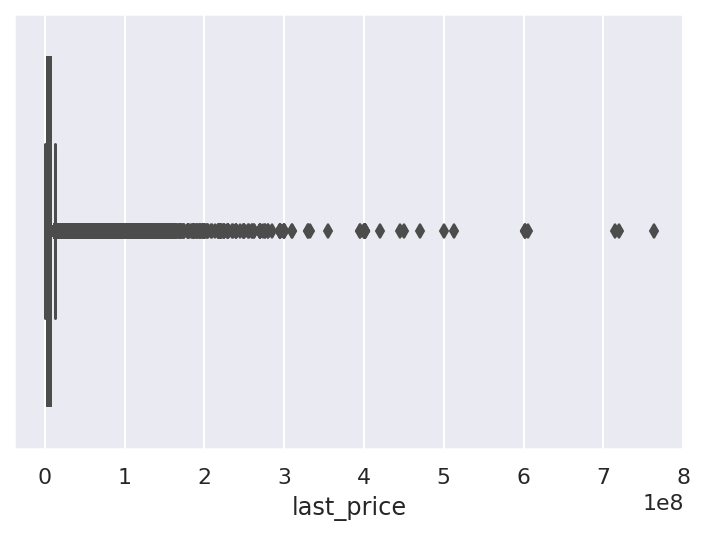

In [131]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'
sns.boxplot(x='last_price',data=sell_df)

From the graph we can see that values of last price after 400000000 should be outliers. Let's restrict them. 

In [129]:
outliers_sell = sell_df[sell_df.last_price > 400000000]
print("Number of ouliers in sell: {}".format(len(outliers_sell)))

Number of ouliers in sell: 19


In [130]:
outliers_sell.sort_values("last_price",ascending=False).head(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m
224434,619165944711730944,2017-09-30T00:00:00+03:00,2017-11-02T00:00:00+03:00,763000000.0,10,False,7,False,400.0,NaN,250.0,NaN,1.0,1,2,"Россия, Санкт-Петербург, Мичуринская улица, 4",7962972499404580673,1.907500e+06
97051,6184707344369875781,2016-10-08T00:00:00+03:00,2018-06-20T00:00:00+03:00,720000000.0,9,False,8,False,415.0,25.0,250.0,NaN,NaN,1,2,"Россия, Санкт-Петербург, Мичуринская улица, 4",7962972499404580673,1.734940e+06
1036,5028522700590625318,2015-01-21T00:00:00+03:00,2017-01-09T00:00:00+03:00,715000000.0,1,False,9,False,550.0,NaN,NaN,NaN,0.0,1,2,"Россия, Санкт-Петербург, Большая Пушкарская улица, 1",2009094821262044658,1.300000e+06
317067,8310251211233707984,2018-03-26T00:00:00+03:00,2018-08-20T00:00:00+03:00,605740032.0,2,False,5,False,443.0,10.0,248.0,0.0,NaN,1,2,"Россия, Санкт-Петербург, Южная дорога, 5",3312559599398519904,1.367359e+06
26451,5028522700620392289,2015-12-10T00:00:00+03:00,2016-02-22T00:00:00+03:00,602400000.0,9,False,8,False,602.4,23.5,309.6,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324,1.000000e+06


Let's calculate price per sq m for selling houses.

In [132]:
outliers_sell['last_price'].value_counts()
sell_df['price_per_sq_m'] = sell_df.last_price/sell_df.area
house_sell_df = sell_df.groupby('unified_address').price_per_sq_m.median().reset_index()
house_sell_df.head(5)

,unified_address,price_per_sq_m
0,"Россия, Ленинградская область, Бокситогорск, Городская улица, 1",15316.249610
1,"Россия, Ленинградская область, Бокситогорск, Городская улица, 3",19080.327869
2,"Россия, Ленинградская область, Бокситогорск, Городская улица, 4",20812.534664
3,"Россия, Ленинградская область, Бокситогорск, Дымское шоссе, 1",14600.000000
4,"Россия, Ленинградская область, Бокситогорск, Заводская улица, 11",14642.978290


In [133]:
house_sell_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)
sell_df = sell_df.merge(house_sell_df)
outliers_count=sell_df[((sell_df.price_per_sq_m/sell_df.house_price_sqm_median) > 3)]
sell_df_cleaned = sell_df[~((sell_df.price_per_sq_m/sell_df.house_price_sqm_median) > 3)]
sell_df_cleaned[sell_df_cleaned.price_per_sq_m > 900000]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
17596,4479241398939301120,2017-11-20T00:00:00+03:00,2018-08-20T00:00:00+03:00,450000000.0,2,False,6,False,470.0,NaN,NaN,NaN,NaN,1,2,"Россия, Санкт-Петербург, Морской проспект, 33",7313362257532056812,9.574468e+05,3.458333e+05
29490,6581971714599458561,2016-01-25T00:00:00+03:00,2017-07-17T00:00:00+03:00,270000000.0,5,False,5,False,298.0,104.0,74.0,NaN,1.0,1,2,"Россия, Санкт-Петербург, набережная Мартынова, 74",4378677413263079911,9.060403e+05,5.260357e+05
63256,2456549,2015-05-08T00:00:00+03:00,2018-08-20T00:00:00+03:00,250000000.0,4,False,4,False,226.0,NaN,160.0,NaN,3.0,1,2,"Россия, Санкт-Петербург, Песочная набережная, 12",4476279760502416431,1.106195e+06,4.844961e+05
63262,5289843,2016-01-25T00:00:00+03:00,2017-03-19T00:00:00+03:00,150000000.0,6,False,3,False,155.5,19.0,82.0,NaN,1.0,1,2,"Россия, Санкт-Петербург, Песочная набережная, 12",4476279760502416431,9.646302e+05,4.844961e+05
69929,5028522700620392289,2015-12-10T00:00:00+03:00,2016-02-22T00:00:00+03:00,602400000.0,9,False,8,False,602.4,23.5,309.6,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324,1.000000e+06,5.000000e+05
69932,5028522700620392291,2015-12-10T00:00:00+03:00,2017-01-09T00:00:00+03:00,401300000.0,9,False,6,False,352.5,18.0,175.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324,1.138440e+06,5.000000e+05
69948,5028522700620450081,2016-03-21T00:00:00+03:00,2017-01-09T00:00:00+03:00,602400000.0,9,False,8,False,525.8,23.5,224.1,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324,1.145683e+06,5.000000e+05
81042,5028522704318229029,2015-09-28T00:00:00+03:00,2017-01-09T00:00:00+03:00,401300000.0,9,False,6,False,352.5,18.0,175.0,NaN,6.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,1.138440e+06,5.000000e+05
81052,5028522704340151610,2016-05-16T00:00:00+03:00,2017-01-09T00:00:00+03:00,602400000.0,9,False,8,False,525.8,23.5,308.6,NaN,6.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,1.145683e+06,5.000000e+05
81054,465842340730588673,2016-02-20T00:00:00+03:00,2017-03-19T00:00:00+03:00,401300000.0,9,False,5,False,401.0,24.0,204.0,NaN,1.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,1.000748e+06,5.000000e+05


In [135]:
sell_df_cleaned = sell_df_cleaned[~(sell_df_cleaned.price_per_sq_m > 700000) 
                                     | ((sell_df_cleaned.price_per_sq_m/sell_df_cleaned.house_price_sqm_median>=2))]
sell_df_cleaned.last_price.max()

602400000.0

In [136]:
max_sell_apartment = sell_df_cleaned[sell_df_cleaned.last_price == sell_df_cleaned.last_price.max()]
max_sell_apartment.unified_address.iloc[0]

'Россия, Санкт-Петербург, набережная реки Фонтанки, 76'

We can check this house on the website:

In [137]:
import urllib
print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/".format(urllib.parse.quote(max_sell_apartment.unified_address.iloc[0])))

https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%BD%D0%B0%D0%B1%D0%B5%D1%80%D0%B5%D0%B6%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B5%D0%BA%D0%B8%20%D0%A4%D0%BE%D0%BD%D1%82%D0%B0%D0%BD%D0%BA%D0%B8%2C%2076/snyat/kvartira/


House with the most expensive sell price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers:

In [138]:
sell_df_cleaned= sell_df_cleaned[~(sell_df_cleaned.unified_address=='Россия, Санкт-Петербург, Бронницкая улица, 27')]
sell_df_cleaned= sell_df_cleaned[~(sell_df_cleaned.unified_address=='Россия, Санкт-Петербург, Ломоносов, Дворцовый проспект, 16А')]
house_sell_df_cleaned = sell_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()
house_sell_df_cleaned.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)

# the most expensive house
most_expensive_house = house_sell_df_cleaned[house_sell_df_cleaned.house_price_sqm_median_cleaned == house_sell_df_cleaned.house_price_sqm_median_cleaned.max()]
most_expensive_house

,unified_address,house_price_sqm_median_cleaned
10732,"Россия, Санкт-Петербург, 2-я Берёзовая аллея, 13-15В",683333.333333


In [140]:
house_sell_df_cleaned.sort_values('house_price_sqm_median_cleaned',ascending=False).head(5)

,unified_address,house_price_sqm_median_cleaned
10732,"Россия, Санкт-Петербург, 2-я Берёзовая аллея, 13-15В",683333.333333
23009,"Россия, Санкт-Петербург, Санаторная аллея, 3",680914.512922
10731,"Россия, Санкт-Петербург, 2-я Берёзовая аллея, 13-15",632133.450395
23010,"Россия, Санкт-Петербург, Санаторная аллея, 4",629531.970995
20282,"Россия, Санкт-Петербург, Петровская набережная, 2к2",613718.411552


House with the cheapest sell price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers:

In [141]:
house_sell_df_cleaned_spb = house_sell_df_cleaned[house_sell_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
house_sell_df_cleaned_spb[house_sell_df_cleaned_spb.house_price_sqm_median_cleaned == house_sell_df_cleaned_spb.house_price_sqm_median_cleaned.min()]

,unified_address,house_price_sqm_median_cleaned
16233,"Россия, Санкт-Петербург, Конторская улица, 16",5000.0


### The cheapest apartment for sell in St. Petersburg after cleaning outliers

In [142]:
sell_df_cleaned_spb = sell_df_cleaned[sell_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_sq_m_in_spb = sell_df_cleaned_spb.price_per_sq_m.median()
print("Median price per sq m in St. Petersburg in rent: {}".format(median_price_per_sq_m_in_spb))

Median price per sq m in St. Petersburg in rent: 102272.72727272728


In [143]:
min_outliers= sell_df_cleaned[sell_df_cleaned.price_per_sq_m <50000]
print(len(min_outliers))

14423


In [144]:
sell_df_cleaned_spb = sell_df_cleaned_spb[~((sell_df_cleaned_spb.price_per_sq_m < 70000) 
                                             & (sell_df_cleaned_spb.house_price_sqm_median/sell_df_cleaned_spb.price_per_sq_m >= 1.5))]
sell_df_cleaned_spb = sell_df_cleaned_spb[~((sell_df_cleaned_spb.price_per_sq_m < 70000) 
                                          & (sell_df_cleaned_spb.house_price_sqm_median == sell_df_cleaned_spb.price_per_sq_m))]
sell_df_cleaned_spb = sell_df_cleaned_spb[~(sell_df_cleaned_spb.price_per_sq_m < 20000)]

# the most cheapest apartment for sell in St. Petersburg after cleaning outliers
cheapest_offer = sell_df_cleaned_spb[sell_df_cleaned_spb.last_price == sell_df_cleaned_spb.last_price.min()]
cheapest_offer

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
130223,455416283964078337,2018-01-17T00:00:00+03:00,2018-01-23T00:00:00+03:00,1150000.0,1,False,0,True,12.4,NaN,NaN,NaN,3.0,1,2,"Россия, Санкт-Петербург, проспект Металлистов, 82к1",7342262232736185949,92741.935484,92941.176471
204795,6784411044483888641,2018-02-12T00:00:00+03:00,2018-03-29T00:00:00+03:00,1150000.0,1,False,0,True,13.0,NaN,7.0,NaN,NaN,1,2,"Россия, Санкт-Петербург, Елагинский проспект, 42",8117016342736435748,88461.538462,90592.334495
208742,8853833657479131905,2018-06-01T00:00:00+03:00,2018-08-07T00:00:00+03:00,1150000.0,1,False,0,True,12.2,NaN,NaN,NaN,10.0,1,2,"Россия, Санкт-Петербург, проспект Культуры, 11к2",3550571368450249088,94262.295082,94262.295082
242614,704638794285574144,2018-06-07T00:00:00+03:00,2018-07-10T00:00:00+03:00,1150000.0,1,False,0,True,12.2,NaN,11.1,NaN,3.0,1,2,"Россия, Санкт-Петербург, проспект Культуры, 11А",4874984643810537528,94262.295082,91489.361702


### The most expensive apartment for sell in St. Petersburg after cleaning outliers

In [151]:
expensive_offer = sell_df_cleaned_spb[sell_df_cleaned_spb.last_price == sell_df_cleaned_spb.last_price.max()]
expensive_offer

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
69929,5028522700620392289,2015-12-10T00:00:00+03:00,2016-02-22T00:00:00+03:00,602400000.0,9,False,8,False,602.4,23.5,309.6,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324,1.000000e+06,500000.0
69948,5028522700620450081,2016-03-21T00:00:00+03:00,2017-01-09T00:00:00+03:00,602400000.0,9,False,8,False,525.8,23.5,224.1,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324,1.145683e+06,500000.0
81052,5028522704340151610,2016-05-16T00:00:00+03:00,2017-01-09T00:00:00+03:00,602400000.0,9,False,8,False,525.8,23.5,308.6,NaN,6.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,1.145683e+06,500000.0


In [145]:
house_sell_df_cleaned_spb = sell_df_cleaned_spb.groupby('unified_address').price_per_sq_m.median().reset_index()
house_sell_df_cleaned_spb.rename(columns = {'price_per_sq_m': 'house_pricesell_sqm_median_cleaned'}, inplace = True)
cheapest_house = house_sell_df_cleaned_spb[house_sell_df_cleaned_spb.house_pricesell_sqm_median_cleaned == house_sell_df_cleaned_spb.house_pricesell_sqm_median_cleaned.min()]
cheapest_house

,unified_address,house_pricesell_sqm_median_cleaned
13679,"Россия, Санкт-Петербург, Трудовая улица, 17",38085.784314


In [146]:
print("https://realty.yandex.ru/archive/{}/snyat/kvartira/".format(urllib.parse.quote(cheapest_house.unified_address.iloc[0])))

https://realty.yandex.ru/archive/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%A2%D1%80%D1%83%D0%B4%D0%BE%D0%B2%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%2017/snyat/kvartira/


In [147]:
house_sell_df_cleaned_spb.head()

,unified_address,house_pricesell_sqm_median_cleaned
0,"Россия, Санкт-Петербург, 1-й Муринский проспект, 11",102630.689500
1,"Россия, Санкт-Петербург, 1-й Муринский проспект, 13",99834.656085
2,"Россия, Санкт-Петербург, 1-й Муринский проспект, 15",91615.179391
3,"Россия, Санкт-Петербург, 1-й Муринский проспект, 17",79189.163588
4,"Россия, Санкт-Петербург, 1-й Муринский проспект, 19",97281.369639


In [148]:
house_rent_df_cleaned_spb.head()

,unified_address,house_price_sqm_median_cleaned
0,"Россия, Санкт-Петербург, 1-й Муринский проспект, 11",571.383648
1,"Россия, Санкт-Петербург, 1-й Муринский проспект, 13",500.000000
2,"Россия, Санкт-Петербург, 1-й Муринский проспект, 15",569.743935
3,"Россия, Санкт-Петербург, 1-й Муринский проспект, 17",600.000000
4,"Россия, Санкт-Петербург, 1-й Муринский проспект, 19",482.142857


### Calculation how many years does it take to cover all money spent on buying apartment by renting it

We need to find houses in which it's the most effective to invest in buying if you plan to rent and houses in which it will be the most ineffective.

Top 10 houses with the most effective investments:

In [149]:
Investment=house_sell_df_cleaned_spb.merge(house_rent_df_cleaned_spb)
Investment['ROI'] = house_sell_df_cleaned_spb.house_pricesell_sqm_median_cleaned/house_rent_df_cleaned_spb.house_price_sqm_median_cleaned
Investment.sort_values('ROI',ascending=False).head(10)

,unified_address,house_pricesell_sqm_median_cleaned,house_price_sqm_median_cleaned,ROI
14879,"Россия, Санкт-Петербург, улица Орджоникидзе, 9",97441.860465,608.730159,1507.246377
14837,"Россия, Санкт-Петербург, улица Орджоникидзе, 15",104018.912530,580.141129,1457.142857
462,"Россия, Санкт-Петербург, 6-я Красноармейская улица, 16",125625.000000,796.428571,1413.004183
5801,"Россия, Санкт-Петербург, Моховая улица, 17",106353.591160,800.000000,1341.393494
8376,"Россия, Санкт-Петербург, Рюхина улица, 10",305841.924399,700.000000,1329.185520
4519,"Россия, Санкт-Петербург, Кронштадт, Советская улица, 11А",90692.124105,476.190476,1322.908910
8380,"Россия, Санкт-Петербург, Рябиновая улица, 17к3",130045.681063,500.000000,1306.481481
8066,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, Школьная улица, 6",83473.239723,668.487395,1299.570342
14860,"Россия, Санкт-Петербург, улица Орджоникидзе, 40",100117.924528,486.486486,1267.905029
14636,"Россия, Санкт-Петербург, улица Мира, 10",161883.738043,905.405405,1260.638298


Top 10 houses with the most ineffective investments:

In [150]:
Investment.sort_values('ROI').head(10)

,unified_address,house_pricesell_sqm_median_cleaned,house_price_sqm_median_cleaned,ROI
5087,"Россия, Санкт-Петербург, Лиговский проспект, 237",100937.428896,666.666667,19.762390
4324,"Россия, Санкт-Петербург, Красное Село, улица Спирина, 3к2",83536.657446,446.637427,33.315364
12494,"Россия, Санкт-Петербург, проспект Энтузиастов, 30к2",86378.799110,495.478036,33.800000
10954,"Россия, Санкт-Петербург, проспект КИМа, 9",92189.849419,571.428571,34.502632
5088,"Россия, Санкт-Петербург, Лиговский проспект, 247",107076.098059,688.695652,35.049020
12522,"Россия, Санкт-Петербург, проспект Юрия Гагарина, 14к1",135592.132505,755.847953,36.422222
12521,"Россия, Санкт-Петербург, проспект Юрия Гагарина, 12к1",118435.734211,554.939640,37.005208
5074,"Россия, Санкт-Петербург, Лиговский проспект, 183В",108439.542484,479.302832,37.589924
5080,"Россия, Санкт-Петербург, Лиговский проспект, 212",89179.548157,666.666667,40.751301
13467,"Россия, Санкт-Петербург, улица Дыбенко, 22к1",99275.680421,495.454545,41.133361
